In [2]:
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider
from qiskit import Aer, transpile

# Save account credentials.
# IBMProvider.save_account(token=MY_API_TOKEN)

# Load previously saved account credentials.
# provider = IBMProvider()

# Construct a noisy simulator backend from an IBMQ backend
# This simulator backend will be automatically configured
# using the device configuration and noise model 

provider = IBMProvider()
provider = IBMProvider(instance="ibm-q-ornl/ornl/csc500")

# Select a backend.
# backend = Aer.get_backend('aer_simulator')
backend = provider.get_backend('simulator_mps')
#backend = provider.get_backend('ibmq_qasm_simulator')
#Display current supported backends
print(provider.backends())

[<IBMBackend('ibm_nazca')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_algiers')>, <IBMBackend('ibmq_mumbai')>, <IBMBackend('simulator_mps')>, <IBMBackend('ibm_cairo')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('simulator_statevector')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_hanoi')>, <IBMBackend('ibmq_kolkata')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_cusco')>]


In [3]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la
from qiskit_textbook.tools import array_to_latex
from math import pi

We will perform the transeverse field Ising model (TFIM) by using Trotter expansion

The many-body spin Hamiltnonian is given by:

$$ \mathcal{H}= -J \sum_{i}\sigma^z_i\sigma^z_{i+1} - B \sum_i \sigma^x_i $$

This is an exactly solvable model. So, we will simulate time eveolution of two-spin wave function:
    
$$ | \Psi (t + \Delta t) > = e^{-i \mathcal{H} t} | \Psi(t)> $$

where the Trotterized Hamiltonian operator is
    
$$ e^{-i \mathcal{H} t} =  CX(q_0,q_1) ~ R_{1}^{z} (-2 \Delta t J) ~ CX(q_0,q_1) ~ R_{0}^{x} (-2 \Delta t B) ~ R_{1}^{x} (-2 \Delta t B) + O(\Delta t^2)$$

In [4]:
### Physical parameters (atomic units) ###
J = 1.0    # Exchange coupling
B = 0.5    # Transverse magnetic field
#dt = 0.01  # Time-discretization unit


In [5]:
### Build a circuit ###

#circ = QuantumCircuit(2, 2)  # 2 quantum & 2 classical registers
def ising(circ,q0,q1,c0,c1,dt):

    circ.rx(-2*dt*B, 0)  # Transverse-field propagation of spin 0
    circ.rx(-2*dt*B, 1)  # Transverse-field propagation of spin 0
    circ.cx(0, 1)        # Exchange-coupling time propagation (1)
    circ.rz(-2*dt*J, 1)  #                                    (2)
    circ.cx(0, 1)        #                                    (3)
    circ.measure(range(2), range(2))  # Measure both spins

/home/zohalaraib/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


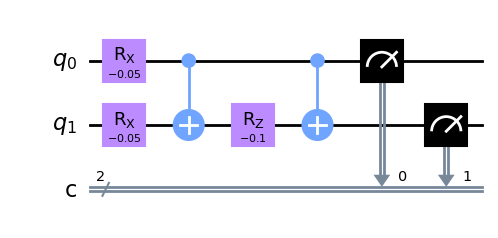

In [6]:
# Draw full circuit

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")
# Define Ising Model Circuit "ic" for simulation
ic = QuantumCircuit(q,c)

dt=0.05

ising(ic,0,1,0,1,dt)

ic.draw('mpl')

In [9]:
# Transpile the quantum circuit to low-level QASM instructions
#from qiskit import transpile
#circ_compiled = transpile(circ, backend)

In [10]:
# Execute the circuit on the Qasm simulator, repeating 1024 times
#job_sim = backend.run(circ_compiled, shots=1024)

In [11]:
# Grab the results from the job
#result_sim = job_sim.result()

In [7]:
def digit_sum(n):
    num_str = str(n)
    sum = 0
    for i in range(0, len(num_str)):
        sum += int(num_str[i])
    return sum

In [10]:
# SIMULATOR #

shots = 516
coupling_map = None
mag_sim = []

for i in range(200):
    q = QuantumRegister(2, "q")
    c = ClassicalRegister(2, "c")
    # Define Ising Model Circuit "ic" for simulation
    ic = QuantumCircuit(q,c)
    
    dt=i*0.05
    
    ising(ic,q[0],q[1],c[0],c[1],dt)
    
    result = execute(ic, backend=backend,
                    coupling_map=coupling_map, shots=shots).result()
    res = result.get_counts(ic)
    
    #print("res = ", res)
    
    r1=list(res.keys())
    
    #print("r1 - keys = ", r1, "len(r1) = ", len(r1))
    
    r2=list(res.values())
    
    #print("r2 - values = ", r2)
    
    print("                          ")
    
#===============================    
    M=0
    
    for j in range(0,len(r1)):
        
        #print("digit_sum(r1[j] = ", digit_sum(r1[j]))
        #print("r2[j] = ", r2[j])
        #print("                  ")
        
        M = M + (2 - 1*digit_sum(r1[j]))*r2[j]/shots
        
    print("time: ",dt, ";  <sigma_z>: ", M/2)
    print("                  ")
    
    mag_sim.append(M/2)

                          
time:  0.0 ;  <sigma_z>:  1.0
                  
                          
time:  0.05 ;  <sigma_z>:  0.999031007751938
                  
                          
time:  0.1 ;  <sigma_z>:  0.997093023255814
                  
                          
time:  0.15000000000000002 ;  <sigma_z>:  0.9922480620155039
                  
                          
time:  0.2 ;  <sigma_z>:  0.9893410852713178
                  
                          
time:  0.25 ;  <sigma_z>:  0.9883720930232558
                  
                          
time:  0.30000000000000004 ;  <sigma_z>:  0.9825581395348838
                  
                          
time:  0.35000000000000003 ;  <sigma_z>:  0.9699612403100776
                  
                          
time:  0.4 ;  <sigma_z>:  0.9612403100775193
                  
                          
time:  0.45 ;  <sigma_z>:  0.9428294573643412
                  
                          
time:  0.5 ;  <sigma_z>:  0.9

In [14]:
# Plot histogram
#from qiskit.visualization import plot_histogram
#plot_histogram(counts)

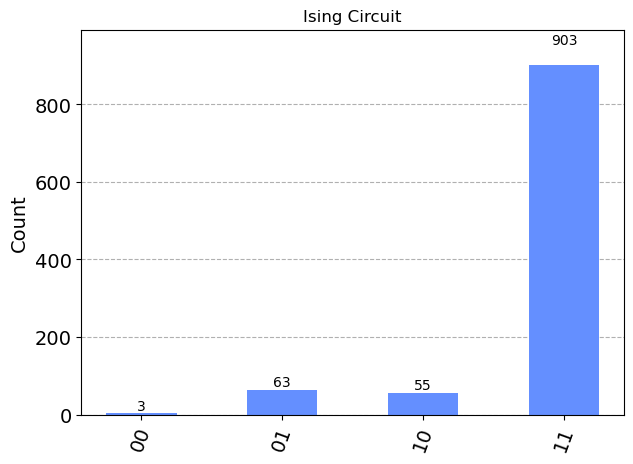

In [15]:
result = execute(ic, backend).result()
counts = result.get_counts(ic)
plot_histogram(counts, title="Ising Circuit")

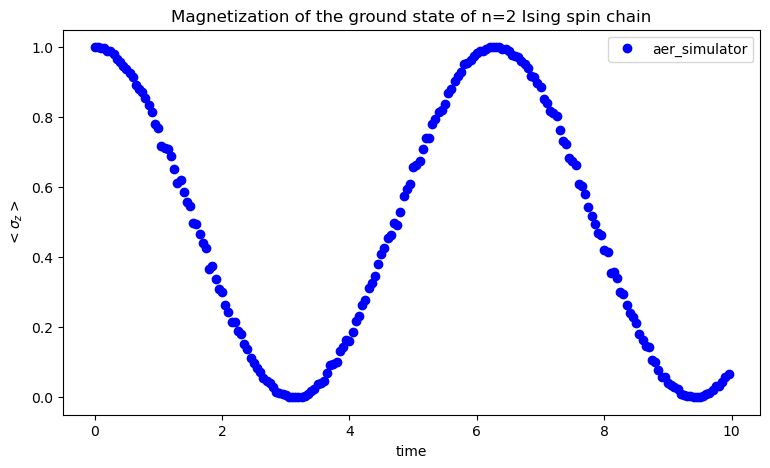

In [9]:
# Plot results

l1=np.arange(0.0,10.0,0.05)
#l1=np.arange(0.0,20.0,0.05)
plt.figure(figsize=(9,5))
#plt.plot(l,vexact(l),'k',label='exact')
plt.plot(l1, mag_sim, 'bo',label='aer_simulator')
#plt.plot(l1, mag_sim, 'bo',label='simulator_mps')
#plt.plot(l1, mag_sim, 'r*',label='ibmq_qasm_simulator')
#plt.xlabel('$\lambda$')
plt.xlabel('time')
plt.ylabel('$<\sigma_{z}>$')
plt.legend()
plt.title('Magnetization of the ground state of n=2 Ising spin chain')
plt.show()